In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
import json
import matplotlib.pyplot as plt

In [2]:
from html2image import Html2Image

def save_table_as_pic(df, name):
    dict_data = [df.to_dict(), df.to_dict('index')]
    htmldf = '<!DOCTYPE HTML><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"></head><body>'

    htmldf = htmldf + '<table  width="auto" ><tr>'

    for key in dict_data[0].keys():
        htmldf = htmldf + '<th class="header" height="30px" style="font-weight: bold; background-color: #C0C9CC; padding: 15px;">' + key + '</th>'

    htmldf = htmldf + '</tr>'

    for key in dict_data[1].keys():
        htmldf = htmldf + '<tr height="30px"'
        htmldf = htmldf + 'style="padding: 5px;" >' if key % 2 == 0 else htmldf + 'style="background-color: #F2F1F0; padding: 5px;">'
        for subkey in dict_data[1][key]:
            htmldf = htmldf + '<td style="padding: 5px;">' + str(dict_data[1][key][subkey]) + '</td>'
        htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr></table></body></html>'

    with open(name+'.html','wb') as f:
        f.write(htmldf.encode("utf-8"))


In [247]:
zonas = pd.read_excel("data/geo_data/apoio/zonas.xlsx", sheet_name="Folha1")
zonas.head()

,Zona,Nome
0,1,Gimonde
1,3,Gimonde
2,4,Samil
3,6,Samil
4,22,Grijó de Parada


In [205]:
len(zonas)

49

In [4]:
df = pd.read_csv("data/dataset.csv", low_memory=False, usecols=["Year", "Consumer_type", "Installation_zone", 
                                                                "Consumption"])
df.head(5)

,Year,Consumer_type,Installation_zone,Consumption
0,2013,1,4,0
1,2013,2,6,5
2,2013,1,6,6
3,2013,1,6,1
4,2013,1,6,13


In [5]:
table = df.merge(zonas, left_on='Installation_zone', right_on='Zona', how = 'inner').drop(columns = ['Year', 'Zona', 'Consumer_type', 'Installation_zone'])
table = table.groupby(['Nome'], as_index = False).sum().sort_values('Consumption', ascending=False).rename(columns={'Nome':'Zone'})
table.head()

,Zone,Consumption
11,Gimonde,1205245
30,Samil,1128454
15,"Izeda, Calvelhe e Paradinha Nova",56474
7,Coelhoso,19860
27,Rebordãos,19839


In [6]:
zonas1 = table.iloc[:25,:].reset_index().drop(columns=['index'])
zonas2 = table.iloc[25:,:].reset_index().rename(columns={'Zone':'Zone ', 'Consumption':'Consumption '}).drop(columns=['index'])

concatenated = pd.concat([zonas1, zonas2], axis="columns")
concatenated = concatenated.replace(np.nan, 0, regex=True)
concatenated = concatenated.astype({'Consumption ':'int'})
concatenated = concatenated.replace(0, '', regex=True)
concatenated

,Zone,Consumption,Zone,Consumption
0,Gimonde,1205245,Quintela de Lampaças,7283
1,Samil,1128454,Serapicos,7010
2,"Izeda, Calvelhe e Paradinha Nova",56474,Babe,6871
3,Coelhoso,19860,Gondesende,6822
4,Rebordãos,19839,Gostei,6618
5,Parada e Faílde,16334,Rebordainhos e Pombares,6602
6,São Pedro de Sarracenos,15914,Castro de Avelãs,5895
7,Nogueira,14403,Pinela,5394
8,São Julião de Palácios e Deilão,12696,Carragosa,5287
9,Rio Frio e Milhão,11556,Zoio,4757


In [253]:
save_table_as_pic(concatenated, 'max_consumption_by_zones')

In [38]:
pt = gpd.read_file('data/geo_data/shp/freguesias/freguesias.shp')
br = pt[pt['Concelho'] == 'BRAGANÇA']
br = br.replace({'Freguesia': "União das freguesias de Izeda, Calvelhe e Paradinha Nova"}, "Izeda, Calvelhe e Paradinha Nova") 
br = br.replace({'Freguesia':"União das freguesias de São Julião de Palácios e Deilão"}, "São Julião de Palácios e Deilão")
br = br.replace({'Freguesia': "União das freguesias de Sé, Santa Maria e Meixedo"}, "Sé, Santa Maria e Meixedo")
br = br.replace({'Freguesia': "União das freguesias de Castrelos e Carrazedo"}, "Castrelos e Carrazedo")
br = br.replace({'Freguesia': "União das freguesias de Rio Frio e Milhão"}, "Rio Frio e Milhão")
br = br.replace({'Freguesia': "União das freguesias de Parada e Faílde"}, "Parada e Faílde")
br = br.replace({'Freguesia': "União das freguesias de Rebordainhos e Pombares"},"Rebordainhos e Pombares")
br = br.replace({'Freguesia': "União das freguesias de Aveleda e Rio de Onor"},"Aveleda e Rio de Onor")
br = br.drop(['Dicofre', 'Concelho', 'Distrito', 'TAA', 'AREA_EA_Ha', 'AREA_T_Ha', 'Des_Simpli'], axis=1)

In [9]:
tick_labels = {'0': '0', '5': '0.1', '10':'0.2', '15':'0.4', '20':'0.6', '25':'0.7', 
               '30':'0.8','35':'0.9', '40':'1'}
anos = [2013, 2014, 2016, 2017, 2018, 2019, 2020]

In [11]:
map_anos = []
for ano in anos:
    ano = df[df['Year'] == ano].drop(columns=['Year', 'Consumer_type'])
    zone = ano.merge(zonas, left_on = 'Installation_zone', right_on='Zona')
    zone = zone.drop(columns=['Zona', 'Installation_zone'])
    zone = zone.groupby(['Nome'], as_index = False).sum()
    zone = zone.rename(columns={'Nome' : 'Name'})
    # zone['Consumption'] = ((zone['Consumption'].max()- zone['Consumption']) / (zone['Consumption'].max()))
    zone = br.merge(zone,  left_on='Freguesia', right_on='Name', how='inner')
    zone = zone.drop(columns=['Freguesia'])
    # .rename(columns = {'geometry' : 'Coordinates'})
    zone.head()
    map_anos.append(zone)
map_anos[0].head()

,geometry,Name,Year,Consumption
0,"POLYGON ((119204.378 219802.954, 119451.422 21...","Izeda, Calvelhe e Paradinha Nova",2013,14171
1,"POLYGON ((103908.514 244201.752, 103896.855 24...",Parâmio,2013,594
2,"POLYGON ((108007.360 253488.354, 108342.446 25...",Espinhosela,2013,903
3,"POLYGON ((112702.966 249568.229, 112703.716 24...",Carragosa,2013,530
4,"POLYGON ((129644.555 247181.101, 129638.015 24...",Aveleda e Rio de Onor,2013,1353


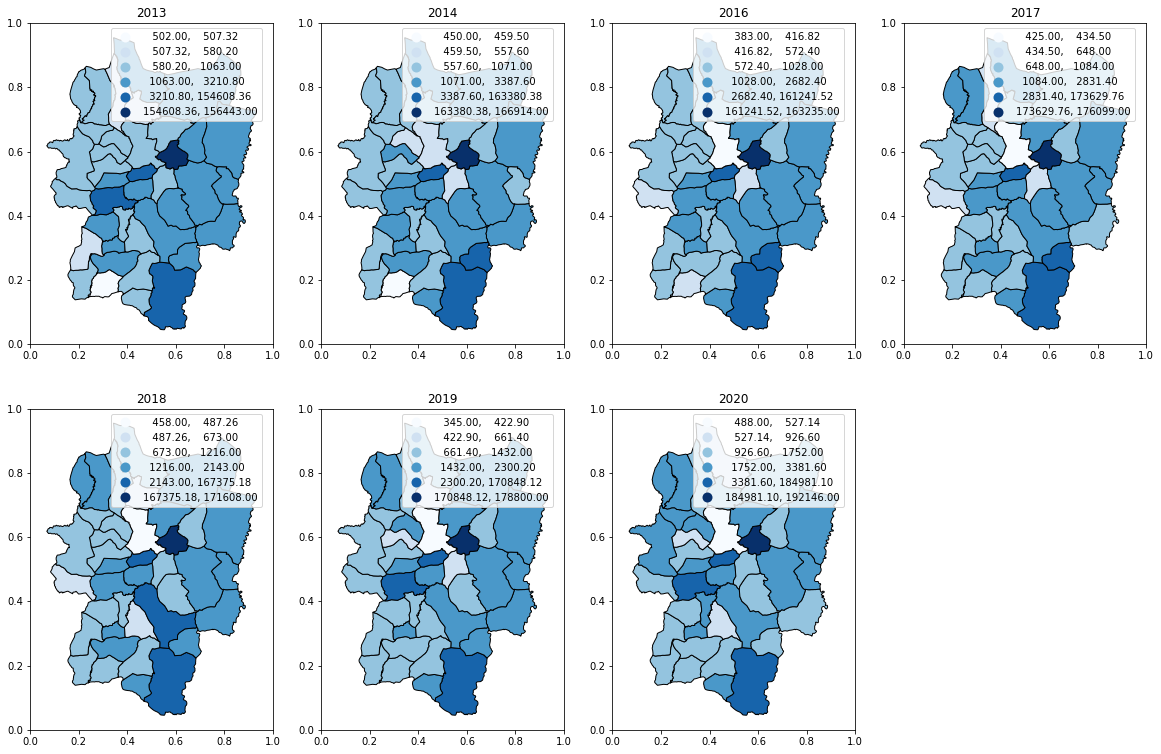

In [241]:
fig, axes = plt.subplots(2, 4, figsize=(20, 13))
plt.axis('off')
for i in range(7):
    ax = fig.add_subplot(2, 4, i+1)
    f = map_anos[i].plot(column='Consumption', ax=ax, cmap="Blues", scheme='Percentiles', edgecolor='black', legend=True, aspect='equal').set_title(anos[i])
    ax.set_axis_off()
    fig.add_axes(ax)
    # f.axes.get_xaxis().set_visible(False)
    # f.axes.get_yaxis().set_visible(False)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("charts/exploratory analysis/yearly_zone_consumption.png", bbox_inches='tight')

# Create dataset for Deck GL-Superset maps

Firstly we have created the JSON file in format for deck gl maps. The scheme is:
<br>
[{<br>
 &emsp;&emsp;contour: [[[-122.4, 37.7], [-122.4, 37.8], [-122.5, 37.8], [-122.5, 37.7], [-122.4, 37.7]], [[-122.45, 37.73], [-122.47, 37.76], [-122.47, 37.71], [-122.45, 37.73]]],<br>
 &emsp;&emsp;zipcode: 94107,<br>
 &emsp;&emsp;population: 26599,<br>
 &emsp;&emsp;area: 6.11<br>
}]<br>
We have JSON format of this data structure, it is necessary to have the columns of this data instead of polygons, date, consumption and etc. 

In [43]:
def coord_lister(geom):
    coords = list(geom.exterior.coords)
    return (coords)

coordinates = br.geometry.apply(coord_lister)

In [132]:
result_arr = []
for i in range(len(map_anos[0]['geometry'])):
    buffer = []
    string_coord = str(map_anos[0]['geometry'][i])[10:-2]
    coord_arr = string_coord.split(", ")
    
    for j in coord_arr:
        coord_arr_2 = j.split(" ")
        coord_arr_2[0] = float(coord_arr_2[0])
        coord_arr_2[1] = float(coord_arr_2[1])
        buffer.append(coord_arr_2 )
    result_arr.append(buffer)
len(result_arr)

39

Read JSON file and create and csv array 

In [294]:
import json

with open("data/polygon_json.json", 'r') as f:
    data = json.load(f)


In [295]:
deck_gl = []
for element in data:
    del element['label']
    element['zipcode'] = int(element['zipcode'].replace('-', ''))
    deck_gl.append(str(element).replace('\'', "\""))

In [296]:
deck_gl = pd.DataFrame(deck_gl)
deck_gl.head()

,0
0,"{""contour"": [[119204.3777000001, 219802.954099..."
1,"{""contour"": [[103908.5142999999, 244201.751700..."
2,"{""contour"": [[108007.3596999999, 253488.354499..."
3,"{""contour"": [[112702.9658000004, 249568.229000..."
4,"{""contour"": [[129644.5551000005, 247181.101199..."


In [299]:
br_gl = br.copy().reset_index()
br_gl = br_gl.join(deck_gl).drop(columns=['index', 'geometry'])
br_gl = br_gl.rename(columns={0: 'geometry'})
br_gl.head()

,Freguesia,geometry
0,"Izeda, Calvelhe e Paradinha Nova","{""contour"": [[119204.3777000001, 219802.954099..."
1,Parâmio,"{""contour"": [[103908.5142999999, 244201.751700..."
2,Espinhosela,"{""contour"": [[108007.3596999999, 253488.354499..."
3,Carragosa,"{""contour"": [[112702.9658000004, 249568.229000..."
4,Aveleda e Rio de Onor,"{""contour"": [[129644.5551000005, 247181.101199..."


In [300]:
zonas = pd.read_excel("data/geo_data/apoio/zonas.xlsx", sheet_name="Folha1")
zonas = zonas.merge(br_gl, left_on='Nome', right_on='Freguesia', how='inner')
zonas = zonas.drop(columns=['Nome']).rename(columns={'Freguesia': 'Name'})
zonas.head()

,Zona,Name,geometry
0,1,Gimonde,"{""contour"": [[122562.2766000004, 237685.438999..."
1,3,Gimonde,"{""contour"": [[122562.2766000004, 237685.438999..."
2,4,Samil,"{""contour"": [[117123.2922999999, 236143.753499..."
3,6,Samil,"{""contour"": [[117123.2922999999, 236143.753499..."
4,22,Grijó de Parada,"{""contour"": [[124054.2172999997, 226263.614299..."


In [301]:
ano = df.drop(columns=['Consumer_type'])
ano.head()

,Year,Installation_zone,Consumption
0,2013,4,0
1,2013,6,5
2,2013,6,6
3,2013,6,1
4,2013,6,13


In [302]:
zone = ano.merge(zonas, left_on = 'Installation_zone', right_on='Zona')
zone = zone.drop(columns=['Zona', 'Installation_zone'])
zone = zone.groupby(['Name', 'geometry', 'Year'], as_index = False).sum()
zone.head()

,Name,geometry,Year,Consumption
0,Alfaião,"{""contour"": [[120049.5335999997, 236045.725700...",2013,584
1,Alfaião,"{""contour"": [[120049.5335999997, 236045.725700...",2014,475
2,Alfaião,"{""contour"": [[120049.5335999997, 236045.725700...",2016,507
3,Alfaião,"{""contour"": [[120049.5335999997, 236045.725700...",2017,450
4,Alfaião,"{""contour"": [[120049.5335999997, 236045.725700...",2018,971


In [303]:
zone.to_csv('data/superset/heatmap_zone_deck_gl.csv')